In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
# mu, sigma = 0.5, 0.1
# s = np.random.normal(mu, sigma, 1000)

# # Create the bins and histogram
# count, bins, ignored = plt.hist(s, 20, normed=True)

# # Plot the distribution curve
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#     np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
# plt.show()

In [2]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt 

## generate the data and plot it for an ideal normal curve

## x-axis for the plot
x_data = np.arange(-5, 5, 0.001)

## y-axis as the gaussian
y_data = stats.norm.pdf(x_axis, 0, 1)

## plot data
plt.plot(x_data, y_data)
plt.show()

NameError: name 'x_axis' is not defined

In [3]:
from numpy import random


x = random.normal(loc=0, scale=1,size=2) #mu_

print(x) 

[1.59970534 1.18924403]


In [23]:
class arms:
    def __init__(me,delta,T):
        me.arm1=random.normal(loc=0, scale=1, size=T)
        me.arm2=random.normal(loc=delta, scale=1, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getrew(me, it):
        return [me.arm1[it],me.arm2[it]]

In [109]:
class bandits:
    def __init__(me):
        me.mean1=0
        me.count1=0
        me.mean2=0
        me.count2=0
    
    def update(me,reward,arm):
        if arm==1:
            updt= me.mean1*me.count1+reward
            me.count1+=1
            me.mean1=updt/me.count1
        elif arm==2: 
            updt= me.mean1*me.count2+reward
            me.count2+=1
            me.mean2=updt/me.count2
        else:
            pass
            
    def fullupdate(me,rewardvec):
        me.update(rewardvec[0],1)
        me.update(rewardvec[1],2)
        
    def returnarm(me):
        return me.mean1, me.mean2

In [253]:
arm=arms(0.1,1000)
# bandit=bandits()
a=np.sum(arm.getarms())
a

60.419033900416906

In [104]:
bandit.returnarm()


(0, 0)

In [ ]:
arm

In [8]:
def optimalGETC(T,delta):
    answer=4/(delta**2)*math.log(T*delta**2/4)
    answer=math.ceil(answer)
    return answer

In [9]:
optimalGETC(1000,0.1) 

367

In [74]:
def GETC(delta,T=1000):
    reward=0
    reward1=0
    reward2=0
    arm=arms(delta,T)
    known_bandits=bandits()
    full_bandits=bandits()
    m=optimalGETC(T,delta)
    chk=0
    for t in range(T):
        rewvec=arm.getrew(t)
        reward1+=rewvec[0]
        reward2+=rewvec[1]
        full_bandits.fullupdate(rewvec)
        if t<=2*m:#m multiplied by number of arms
            i=t%2+1
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            
        else:#t>mK
            if chk==0:
                i=np.argmax(known_bandits.returnarm())+1
                chk=1
            #print(i)
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
    print(i) 
    print(known_bandits.returnarm())
    print([reward1,reward2,reward])
    print(full_bandits.returnarm())
    regret=np.amax([reward1,reward2]) -reward
    return regret
            
        
        
        
    

In [103]:
GETC(0.1)

1
(0.016228976956265358, 0.06708111125342264)
[-3.762443973616467, 58.76710194344453, 2.3785046800093794]
(-0.003762443973616517, -0.0033321477077753)


56.38859726343515

In [24]:
def GETC0(delta,T=1000,T_o=367,arms=[0 for k in range(1000)]):
    reward=0
    reward1=0
    reward2=0
    arm=arms
    known_bandits=bandits()
    full_bandits=bandits()
    m=T_o/2
    chk=0
    for t in range(T):
        rewvec=arm.getrew(t)
        reward1+=rewvec[0]
        reward2+=rewvec[1]
#         full_bandits.fullupdate(rewvec)
        if t<=2*m:#m multiplied by number of arms
            i=t%2+1
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            
        else:#t>mK
            if chk==0:
                i=np.argmax(known_bandits.returnarm())+1
                chk=1
            #print(i)
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
#     print(i) 
#     print(known_bandits.returnarm())
#     print([reward1,reward2,reward])
    regret=np.amax([reward1,reward2]) -reward
    return regret
            
        
        
        
    

In [25]:
median=[0 for i in range(1000)]
maxi=[-22 for i in range(1000)]
mini=[22 for i in range(1000)]
for i in range(1000):
    arm=arms(0.1,10000)
    for j in range (10000):
        reg=GETC0(0.1,1000,i,arm)
        median[i]+=reg
        if reg>maxi[i]:
            maxi[i]=reg
        elif reg<mini[i]:
            mini[i]=reg

    median[i]=median[i]/10000
        

In [49]:
median[367]

57.29074438480148

In [40]:
import pickle


In [43]:
filename = 'mini1'
outfile = open(filename,'wb')

In [44]:
pickle.dump(mini,outfile)
outfile.close()

In [45]:
GETC(0.1,10000)

2
(0.024877811677222014, 0.024891642593219635)
[80.57562170877593, 1089.223977299252, 969.544937866313]


119.67903943293902

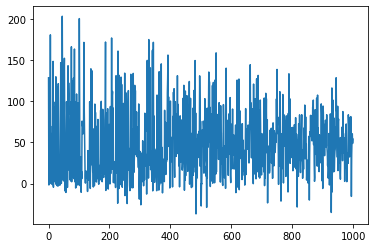

In [50]:
plt.plot(median)

In [ ]:
# Create the bins and histogram
count, bins, ignored = plt.hist(arm.arm1, 10, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *   np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.show()

In [56]:
ban=bandits()

In [134]:
ban.update(2,1)

In [62]:
ban.update(1,2)

In [139]:
ban.returnarm()

(1.8805970149253732, 1.0)